In [2]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [3]:
 # Set path to CSV and read in CSV
csv_path = Path("DATA/ETH/ETH_DATA.csv")
eth_df=pd.read_csv(csv_path)

In [4]:
 # Set index as Date
eth_df = eth_df.set_index(pd.to_datetime(eth_df["Date"], infer_datetime_format=True))

# Display sample data
eth_df.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,,
2015-08-09,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497
2015-08-10,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321
2015-08-11,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331
2015-08-12,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067
2015-08-13,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151
2015-08-14,ETH,2015-08-14,1.951460,1.266023,2.073329,1.149458
2015-08-15,ETH,2015-08-15,1.591219,1.951460,2.225695,1.591219
2015-08-16,ETH,2015-08-16,1.693707,1.591219,1.768860,1.591219
2015-08-17,ETH,2015-08-17,1.423244,1.693707,1.693707,1.099489


In [5]:
#check for na
eth_df.isnull().values.any()

False

In [6]:
#check main_df to see if everything is correct 
eth_df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,,
2015-08-09,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497
2015-08-10,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321
2015-08-11,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331
2015-08-12,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067
2015-08-13,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151
...,...,...,...,...,...,...
2021-07-22,ETH,2021-07-22,2005.726461,1996.464218,2047.176380,1951.522896
2021-07-23,ETH,2021-07-23,2079.950552,2025.431816,2094.962322,1997.437193
2021-07-24,ETH,2021-07-24,2167.821498,2124.998501,2200.929807,2106.546966


In [7]:
 # Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [8]:
#assign atributes to names
#future period desides how many days ahead data will be 
FUTURE_PERIOD_PREDICT = 3

In [9]:
#set data 3 days back to compensate for lag
def add_future_column(eth_df):
    main_df= eth_df.copy()
    main_df['future'] = eth_df["Closing Price (USD)"].shift(-FUTURE_PERIOD_PREDICT)
    
    main_df.dropna(inplace=True)

    main_df.head()
    
    return main_df

In [10]:
#run df thorugh the function to add future coulumn to eth_eval
main_df = add_future_column(eth_df)
main_df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),future
Date,,,,,,,
2015-08-09,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497,0.850151
2015-08-10,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321,1.266023
2015-08-11,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331,1.951460
2015-08-12,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067,1.591219
2015-08-13,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151,1.693707


In [11]:
def get_data():
    
     # Set path to CSV and read in CSV
    csv_path = Path("DATA/ETH/ETH_DATA.csv")
    eth_df=pd.read_csv(csv_path)
    
     # Set index as Date
    eth_df = eth_df.set_index(pd.to_datetime(eth_df["Date"], infer_datetime_format=True))
    
    #run df thorugh the function to add future coulumn to eth_eval
    main_df = add_future_column(eth_df)
    # save data coulmnn 
    date = main_df.Date
    
    
    #remove eth column 
    main_df = main_df.drop(columns = ['Currency'])
    main_df = main_df.drop(columns= ['Date'])

    columns = main_df.columns
    
    
    # Importing the MinMaxScaler from sklearn
    from sklearn.preprocessing import MinMaxScaler

    # Create a MinMaxScaler object
    scaler = MinMaxScaler()

    scaler.fit(main_df)
    
    main_array = scaler.transform(main_df)
    
    RES = pd.DataFrame(data=main_array, columns = columns)
    
    RES = RES.set_index(date)
    
    
    
    return RES,scaler

In [12]:
#reshape
def expand_windowed_data(X1,length_of_sample):
    """LSTM is expecting a 3-D data structure with (batch number, time steps, features)"""
    X2 = create_rolling_windows(X1, length_of_sample)
    X3 = X2.reshape(-1, length_of_sample, X1.shape[1])
    return X3 

In [13]:
def create_rolling_windows(values, count):
    """create a set of records that have the first count rows, then the same number of rows offset by one etc.
    example=abcdefghijklmn
    create_rolling_window(example, 3)
    would return abcbcdcdedefefgfghghihijijkjklklmlmn"""
    firstitem = values[:count]
    items = [values[window_start:window_start + count] for window_start in range(1, 1 + len(values) - count)]
    total = np.append(firstitem, items)
    return total

In [14]:
main_df, scaler = get_data()

In [15]:
main_df

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),future
Date,,,,,
2015-08-09,0.000116,0.000316,0.000325,0.000096,0.000102
2015-08-10,0.000064,0.000115,0.000096,0.000070,0.000203
2015-08-11,0.000058,0.000063,0.000046,0.000060,0.000369
2015-08-12,0.000102,0.000057,0.000150,0.000064,0.000281
2015-08-13,0.000203,0.000101,0.000177,0.000110,0.000306
...,...,...,...,...,...
2021-07-19,0.442534,0.452552,0.437966,0.458085,0.485271
2021-07-20,0.429891,0.435115,0.420265,0.436956,0.503232
2021-07-21,0.476256,0.427497,0.463770,0.445578,0.524497


In [16]:
X1= main_df[["Closing Price (USD)"]].to_numpy()
y1 = main_df[["future"]].to_numpy()

In [17]:
#split data
split = int(0.7 * len(X1))
X_train = X1[: split]
X_test = X1[split:]

y_train = y1[: split]
y_test = y1[split:]

In [18]:
X_train = expand_windowed_data(X_train,9)
y_train = expand_windowed_data(y_train,9)

X_test = expand_windowed_data(X_test,9)
y_test = expand_windowed_data(y_test,9)

In [19]:
print(X1.shape,y1.shape)
print(X_train.shape,y_train.shape)

(2176, 1) (2176, 1)
(1515, 9, 1) (1515, 9, 1)


In [20]:
def create_model(shape):
    model = Sequential()
    model.add(LSTM(16, input_shape=shape, return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(Dense(2))
    return model  

In [21]:

model = create_model(X_train.shape[1:3]) #The last two entries in the shape, data has shape (batches, timesteps, features)
model.compile(optimizer = "adam", loss="mse")
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
48/48 [==============================] - 7s 5ms/step - loss: 0.0032
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 9.0669e-04
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 6.8572e-04
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 5.4181e-04
Epoch 7/100
48/48 [==============================] - 0s 5ms/step - loss: 4.7382e-04
Epoch 8/100
48/48 [==============================] - 0s 5ms/step - loss: 4.0952e-04
Epoch 9/100
48/48 [==============================] - 0s 5ms/step - loss: 3.4861e-04
Epoch 10/100
48/48 [==============================] - 0s 5ms/step - loss: 2.9511e-04
Epoch 11/100
48/48 [==============================] - 0s 5ms/step - loss: 2.4863e-04
Epoch 12/100
48/48 [==============================] - 0s 5ms/step - loss: 2.0761e-04
E

In [22]:
predictions = model.predict(X_test.reshape((-1,9,1)))


In [23]:
  
result= [i[8]for i in predictions]

result_2 = np.array(result)
print(result_2.shape)

(645, 2)


In [24]:
result3= [i[8]for i in X_test]

result_3 = np.array(result3)
print(result_2.shape)

(645, 2)


In [25]:
 # Create a DataFrame of Real and Predicted values
eth_eval = pd.DataFrame({
    "Actual":  X1[split:-8].ravel(),
    "Predicted": result_2.transpose()[1]
}) 

# Show the DataFrame's head
eth_eval

,Actual,Predicted
0,0.046407,0.042554
1,0.043699,0.041900
2,0.043647,0.042725
3,0.043827,0.042540
4,0.044937,0.041935
...,...,...
640,0.520763,0.419870
641,0.492374,0.410000
642,0.468297,0.440431
643,0.485960,0.448826


In [26]:
 # Create a DataFrame of Real and Predicted values
eth_eval = pd.DataFrame({
    "Actual": result_3.transpose()[0],
    "Predicted": result_2.transpose()[1]
}) 

# Show the DataFrame's head
eth_eval

,Actual,Predicted
0,0.041943,0.042554
1,0.041316,0.041900
2,0.042165,0.042725
3,0.041947,0.042540
4,0.041350,0.041935
...,...,...
640,0.442534,0.419870
641,0.429891,0.410000
642,0.476256,0.440431
643,0.485271,0.448826


<AxesSubplot:title={'center':'Actual Vs. Predicted ETH Prices'}>

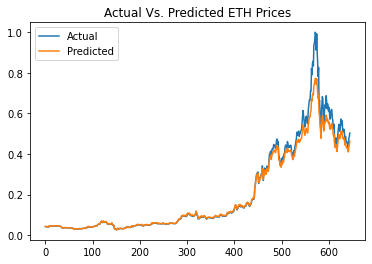

In [27]:
eth_eval.plot(title="Actual Vs. Predicted ETH Prices")

In [28]:
#seprate actual and pred
Pred= eth_eval['Actual']
act= eth_eval['Predicted']

#model eval
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(act, Pred))
print(math.sqrt(mean_squared_error(act, Pred)))
print(mean_absolute_error(act, Pred))

0.001259552658400214
0.03549017692827431
0.015056988729180619


In [29]:
#create buy and sell signals 
#calculate profit and loss

#create 'profit/loss' column to track trade metrics
eth_eval['profit/loss'] = np.nan

#create column to hold buy and cell signals
eth_eval['signals'] = np.nan

#create buy and sell list containers
buy = []
sell = []

#create column that has next days price
eth_eval['next_day'] = eth_eval["Predicted"].shift(-1)

In [30]:
#create loop that buys if next day price is higer and sells if next day price goes down
for index, row in eth_eval.iterrows():

    if row["Predicted"] < row["next_day"]:
        eth_eval.loc[index, "signals"] = "buy"
        buy.append(row["Actual"])
        eth_eval.loc[index, "profit/loss"] = 0
    elif row["Predicted"] > row["next_day"]:
        eth_eval.loc[index, "signals"] = "sell"
        sell.append(row["Actual"])
        #eth_eval.loc[index, "profit/loss"] = sell[-1] - buy[-1]
    else:
        eth_eval.loc[index, "signals"] = "hold"

In [31]:
#create loop that buys if next day price is higer and sells if next day price goes down
for index, row in eth_eval.iterrows():

    if row["Predicted"] > row["next_day"]:
        eth_eval.loc[index, "signals"] = "buy"
        buy.append(row["Actual"])
        eth_eval.loc[index, "profit/loss"] = 0
    elif row["Predicted"] < row["next_day"]:
        eth_eval.loc[index, "signals"] = "sell"
        sell.append(row["Actual"])
        eth_eval.loc[index, "profit/loss"] = sell[-1] - buy[-1]
    else:
        eth_eval.loc[index, "signals"] = "hold"

In [32]:
eth_eval.dropna(inplace= True)

In [33]:
eth_eval

,Actual,Predicted,profit/loss,signals,next_day
0,0.041943,0.042554,0.000000,buy,0.041900
1,0.041316,0.041900,-0.000627,sell,0.042725
2,0.042165,0.042725,0.000000,buy,0.042540
3,0.041947,0.042540,0.000000,buy,0.041935
4,0.041350,0.041935,0.000000,buy,0.039047
...,...,...,...,...,...
639,0.457429,0.430143,0.000000,buy,0.419870
640,0.442534,0.419870,0.000000,buy,0.410000
641,0.429891,0.410000,-0.012643,sell,0.440431
642,0.476256,0.440431,0.033722,sell,0.448826


In [34]:
# calculate total profit/loss and percent return for 1000 total coins

# total amount of initial capital
initial_capital = 1000000

# set total amount of coins
coin_order = 1000

# calculate total profit/loss
total_profit_loss = round(eth_eval["profit/loss"].sum() * coin_order, 2)

# calculate return on investemnt 
roi = round((total_profit_loss / initial_capital) * 100, 2)

# display profit/loss and roi
print(
    f"The total profit/loss of the trading model is ${total_profit_loss}, "
    f"with the total return on investment being {roi}%"
)

The total profit/loss of the trading model is $2040.52, with the total return on investment being 0.2%


<AxesSubplot:title={'center':'Actual Vs. Predicted ETH Prices'}>

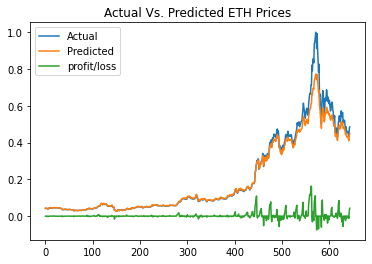

In [35]:
#display plot for presentation 
eth_eval2 = eth_eval.copy()

#drop next day 
eth_eval2.drop('next_day', axis=1, inplace=True)

eth_eval2.plot(title="Actual Vs. Predicted ETH Prices")